# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
        
# List for holding reponse information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | chara
Processing Record 3 of Set 1 | beringovskiy
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | san cristobal
Processing Record 6 of Set 1 | southbridge
Processing Record 7 of Set 1 | zhezkazgan
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | buzmeyin
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | yeppoon
Processing Record 14 of Set 1 | jonuta
Processing Record 15 of Set 1 | korla
Processing Record 16 of Set 1 | nouakchott
Processing Record 17 of Set 1 | fort nelson
Processing Record 18 of Set 1 | karaul
City not found. Skipping...
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | mugur-aksy
Processing Record 22 of Set 1 | but

Processing Record 33 of Set 4 | taltal
Processing Record 34 of Set 4 | omboue
Processing Record 35 of Set 4 | kavaratti
Processing Record 36 of Set 4 | san ignacio de sabaneta
City not found. Skipping...
Processing Record 37 of Set 4 | amderma
City not found. Skipping...
Processing Record 38 of Set 4 | okandja
City not found. Skipping...
Processing Record 39 of Set 4 | wahiawa
Processing Record 40 of Set 4 | egvekinot
Processing Record 41 of Set 4 | lasa
Processing Record 42 of Set 4 | buariki
City not found. Skipping...
Processing Record 43 of Set 4 | paytug
City not found. Skipping...
Processing Record 44 of Set 4 | kracheh
City not found. Skipping...
Processing Record 45 of Set 4 | barth
Processing Record 46 of Set 4 | te anau
Processing Record 47 of Set 4 | grindavik
Processing Record 48 of Set 4 | duku
Processing Record 49 of Set 4 | havre-saint-pierre
Processing Record 50 of Set 4 | launceston
Processing Record 1 of Set 5 | devils lake
Processing Record 2 of Set 5 | esperance
Pro

Processing Record 19 of Set 8 | mandurah
Processing Record 20 of Set 8 | xuddur
Processing Record 21 of Set 8 | bonga
Processing Record 22 of Set 8 | roald
Processing Record 23 of Set 8 | charters towers
Processing Record 24 of Set 8 | nazret
Processing Record 25 of Set 8 | viedma
Processing Record 26 of Set 8 | marienburg
Processing Record 27 of Set 8 | palmer
Processing Record 28 of Set 8 | buriti dos lopes
Processing Record 29 of Set 8 | liverpool
Processing Record 30 of Set 8 | aljezur
Processing Record 31 of Set 8 | bayan
Processing Record 32 of Set 8 | belmonte
Processing Record 33 of Set 8 | dondaicha
Processing Record 34 of Set 8 | yerbogachen
Processing Record 35 of Set 8 | charala
Processing Record 36 of Set 8 | bocas del toro
Processing Record 37 of Set 8 | tiksi
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | ilhabela
Processing Record 40 of Set 8 | tucurui
Processing Record 41 of Set 8 | longonjo
Processing Record 42 of Set 8 | highland
Proce

Processing Record 10 of Set 12 | saint anthony
Processing Record 11 of Set 12 | mahina
Processing Record 12 of Set 12 | rongcheng
Processing Record 13 of Set 12 | teeli
Processing Record 14 of Set 12 | ca mau
Processing Record 15 of Set 12 | puerto escondido
Processing Record 16 of Set 12 | mayo
Processing Record 17 of Set 12 | hobyo
Processing Record 18 of Set 12 | tateyama
Processing Record 19 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 20 of Set 12 | goderich
Processing Record 21 of Set 12 | chornobayivka
Processing Record 22 of Set 12 | solnechnyy
Processing Record 23 of Set 12 | tokur
Processing Record 24 of Set 12 | baykit
Processing Record 25 of Set 12 | senneterre
Processing Record 26 of Set 12 | plettenberg bay
Processing Record 27 of Set 12 | qeshm
Processing Record 28 of Set 12 | coxim
Processing Record 29 of Set 12 | lagoa
Processing Record 30 of Set 12 | monrovia
Processing Record 31 of Set 12 | el suyatal
Processing Record 32 of Set 12 | phan t

In [4]:
len(lat)
len(temp)

610

In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df  = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})
# Show Record Count
city_data_df .count()

City          610
Lat           554
lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [6]:
city_data_df .head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,66.22,73.0,0.0,15.01,AR,1.674628e+09
1,chara,56.9064,118.2631,-16.06,95.0,100.0,1.50,RU,1.674628e+09
2,beringovskiy,63.0500,179.3167,-12.71,94.0,83.0,13.27,RU,1.674628e+09
3,qaanaaq,77.4840,-69.3632,4.75,65.0,87.0,9.69,GL,1.674628e+09
4,san cristobal,7.7669,-72.2250,63.99,79.0,46.0,2.64,VE,1.674628e+09


In [7]:
 #Export the city data into a .csv file.
city_data_df.to_csv("./output_data/cities_w.csv", index=False)

#Load the CSV file into a Pandas DataFrame
city_data_df= pd.read_csv("./output_data/cities_w.csv")

# Display sample data
city_data_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,66.22,73.0,0.0,15.01,AR,1.674628e+09
1,chara,56.9064,118.2631,-16.06,95.0,100.0,1.50,RU,1.674628e+09
2,beringovskiy,63.0500,179.3167,-12.71,94.0,83.0,13.27,RU,1.674628e+09
3,qaanaaq,77.4840,-69.3632,4.75,65.0,87.0,9.69,GL,1.674628e+09
4,san cristobal,7.7669,-72.2250,63.99,79.0,46.0,2.64,VE,1.674628e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

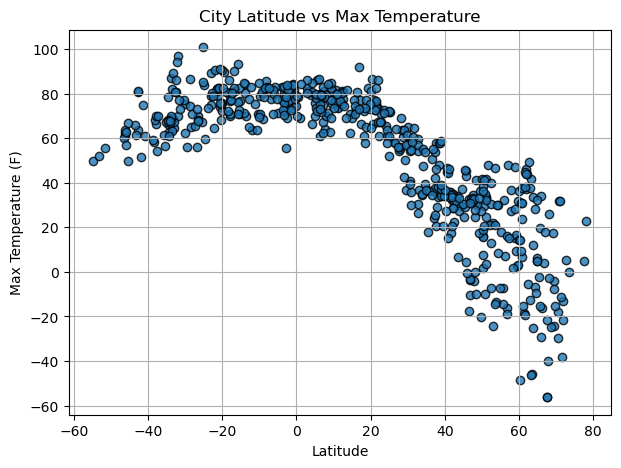

In [8]:


# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(7,5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature")
plt.grid()
plt.savefig("./output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()


#### Latitude Vs. Humidity

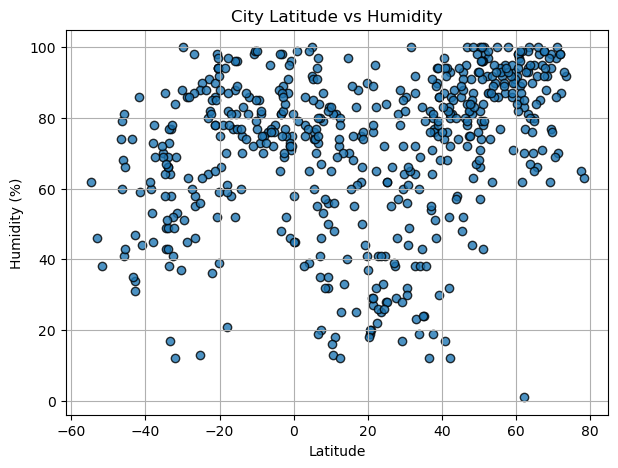

In [9]:
# Build the scatter plots for latitude vs. humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(7, 5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity')
plt.grid()
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

#### Latitude Vs. Cloudiness

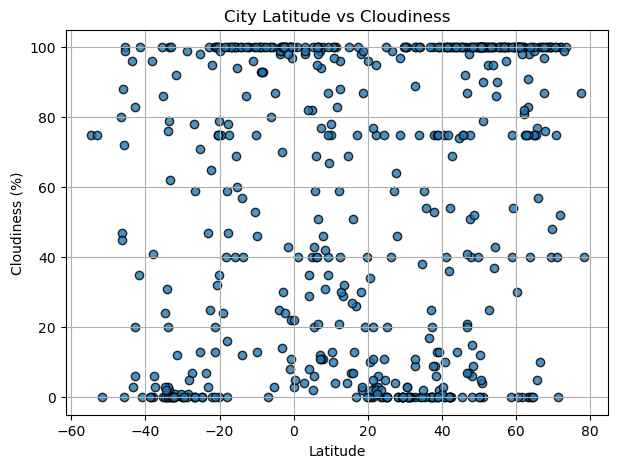

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(7, 5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness')
plt.grid()
plt.savefig("./output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Wind Speed Plot

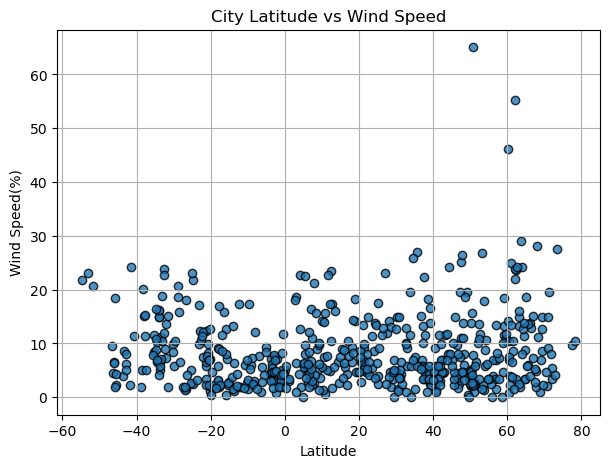

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(7, 5))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(%)')
plt.title(f'City Latitude vs Wind Speed')
plt.grid()
plt.savefig("./output_data/latitude_vs_Wind Speed.png", bbox_inches="tight")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
 # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(7,5))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 7)
    plt.ylabel(y_label,fontsize = 7)
    if ylim is not None:
        plt.ylim(0, ylim)
    
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}",fontsize = 10)
    plt.annotate(line_eq,xy=(10, 50),fontsize=10,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=10,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=10,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
   
 # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,chara,56.9064,118.2631,-16.06,95.0,100.0,1.50,RU,1.674628e+09
2,beringovskiy,63.0500,179.3167,-12.71,94.0,83.0,13.27,RU,1.674628e+09
3,qaanaaq,77.4840,-69.3632,4.75,65.0,87.0,9.69,GL,1.674628e+09
4,san cristobal,7.7669,-72.2250,63.99,79.0,46.0,2.64,VE,1.674628e+09
5,southbridge,42.0751,-72.0334,32.11,93.0,54.0,4.65,US,1.674628e+09


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,66.22,73.0,0.0,15.01,AR,1.674628e+09
9,atuona,-9.8000,-139.0333,78.96,77.0,13.0,17.25,PF,1.674628e+09
12,yeppoon,-23.1333,150.7333,89.38,64.0,3.0,9.93,AU,1.674628e+09
19,rikitea,-23.1203,-134.9692,79.05,80.0,47.0,17.09,PF,1.674628e+09
22,arraial do cabo,-22.9661,-42.0278,74.66,91.0,100.0,12.24,BR,1.674628e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7242715191518234
The correlation between both factors is -0.85


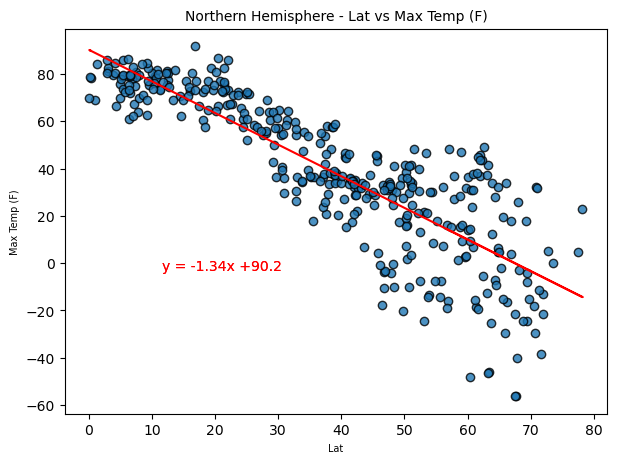

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.2291297446057329
The correlation between both factors is 0.48


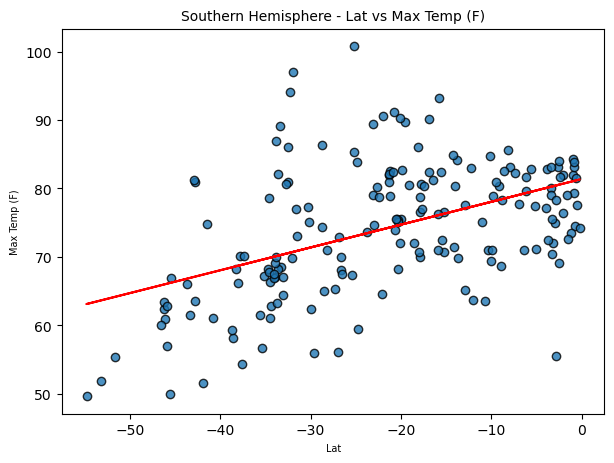

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Southern",(0, 0))
plt.savefig("./output_data/Southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.18878639807734718
The correlation between both factors is 0.43


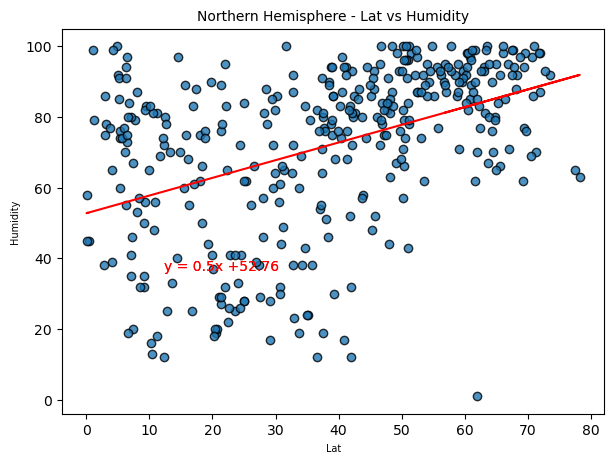

In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Lat", "Humidity", "Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.1865595171181476
The correlation between both factors is 0.43


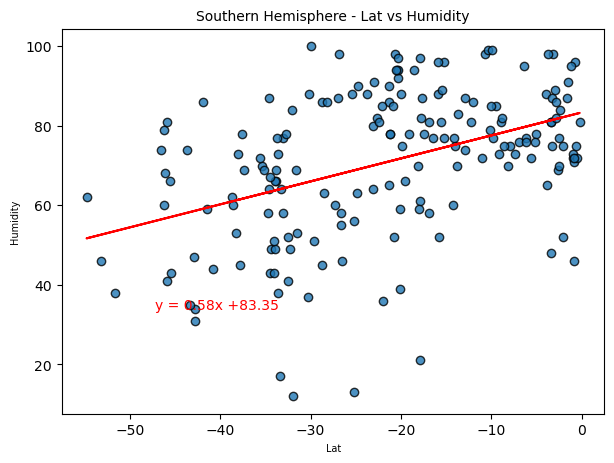

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Lat", "Humidity", "Southern",(0, 0))
plt.savefig("./output_data/Southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.08201804369364576
The correlation between both factors is 0.29


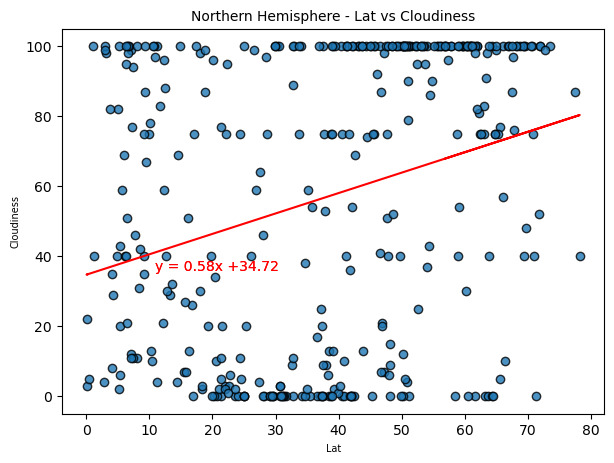

In [19]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Lat", "Cloudiness", "Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.1605317212124771
The correlation between both factors is 0.4


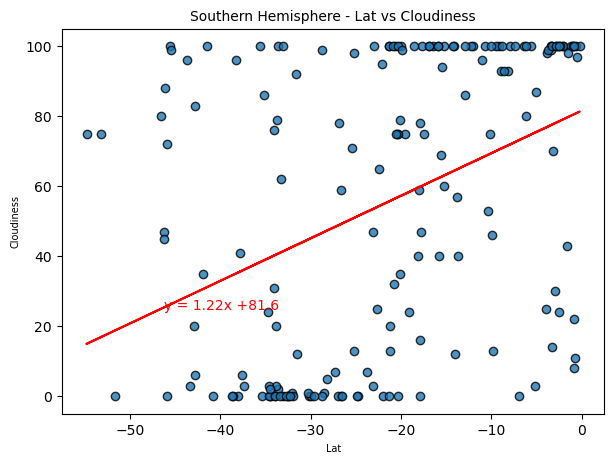

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Lat", "Cloudiness", "Southern",(0, 0))
plt.savefig("./output_data/Southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.013172890034828454
The correlation between both factors is 0.11


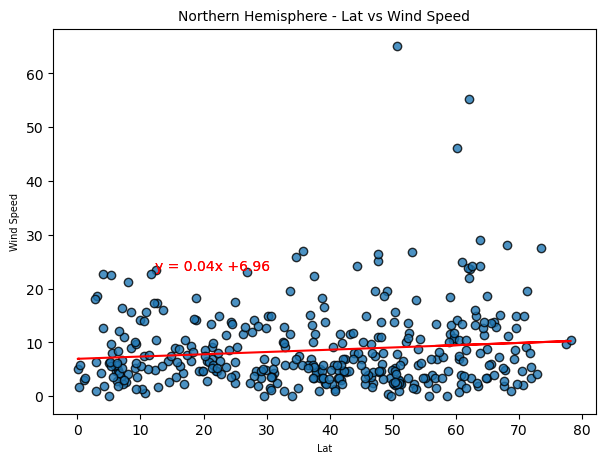

In [21]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Lat", "Wind Speed", "Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.16296890070087344
The correlation between both factors is -0.4


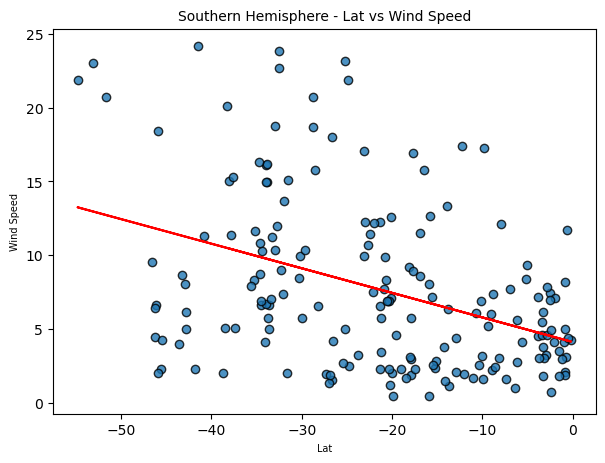

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Lat", "Wind Speed", "Southern",(0, 0))
plt.savefig("./output_data/Southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE